# Lab 6.2: Explaining a simple OR function

This lab examines what it looks like to explain an OR function (OR = logical OR) using SHAP values. It is based on a simple example with two features `is_young` and `is_female`, roughly motivated by the Titanic survival dataset where women and children were given priority during the evacuation and so were more likely to survive. In this simulated example this effect is taken to the extreme, where all children and women survive and no adult men survive.

The goal is to compare the theoretical formulas of the SHAP values to the ones computed by the shap library.

In [1]:
# Print the Python version
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [2]:
# To install shap on your laptop, you can run in Spyder or in a terminal (with Jupyterlab for example)
# conda install -c conda-forge shap
# On Google colab
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.0 MB/s eta 0:00:00


In [3]:
import numpy as np
import shap

### Create a dataset following an OR function

In [4]:
N = 100 # We generate N samples for the dataset
M = 2

# randomly create binary features for (is_young, and is_female)
X = (np.random.randn(N,2) > 0) * 1

# force the first sample to be a young male
X[0,0] = 1
X[0,1] = 0

# you survive only if you are young or female
y = ((X[:,0] + X[:,1]) > 0) * 1

In [5]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


### Train a linear regression model to mimic this OR function

In [6]:
# a simple linear model
import sklearn
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred)

[0.75422627 0.22756827 1.21944083 1.21944083 0.75422627 1.21944083
 1.21944083 0.22756827 0.75422627 0.75422627 0.22756827 0.22756827
 0.69278283 0.22756827 0.75422627 0.22756827 1.21944083 1.21944083
 0.75422627 0.75422627 0.75422627 0.75422627 0.22756827 0.22756827
 0.22756827 0.69278283 1.21944083 0.22756827 0.22756827 1.21944083
 0.69278283 0.22756827 0.75422627 0.75422627 1.21944083 0.69278283
 0.69278283 1.21944083 0.22756827 0.69278283 0.22756827 0.69278283
 0.22756827 0.75422627 0.75422627 1.21944083 0.69278283 1.21944083
 0.75422627 0.75422627 1.21944083 0.69278283 0.22756827 0.22756827
 1.21944083 0.75422627 0.22756827 0.69278283 1.21944083 0.69278283
 0.22756827 0.75422627 1.21944083 0.69278283 1.21944083 0.22756827
 0.22756827 0.22756827 1.21944083 0.69278283 0.75422627 0.69278283
 0.22756827 1.21944083 0.75422627 1.21944083 0.75422627 0.69278283
 1.21944083 0.22756827 0.75422627 0.22756827 0.75422627 1.21944083
 1.21944083 1.21944083 0.22756827 0.69278283 0.22756827 0.7542

### Question 1: Print the coefficients of the linear model: $f(x)=\beta_0 +\beta_1 X_1 + \beta_2 X_2$

In [7]:
# Fill in this cell


## Explain the prediction for a young boy

### Using the training set for the background distribution

Note that in the example explanation below `is_young = True` has a positive value (meaning it increases the model output, and hence the prediction of survival), while `is_female = False` has a negative value (meaning it decreases the model output). While one could argue that `is_female = False` should have no impact because we already know that the person is young, SHAP values account for the impact a feature has even when we don't necessarily know the other features, which is why `is_female = False` still has a negative impact on the prediction.

In [8]:
X[:1,:]

array([[1, 0]])

Model prediction: 0.7542
SHAP values for (is_young = True, is_female = False): [ 0.24752926 -0.22330299]
SHAP base values: 0.73
Model output with SHAP: 0.7542


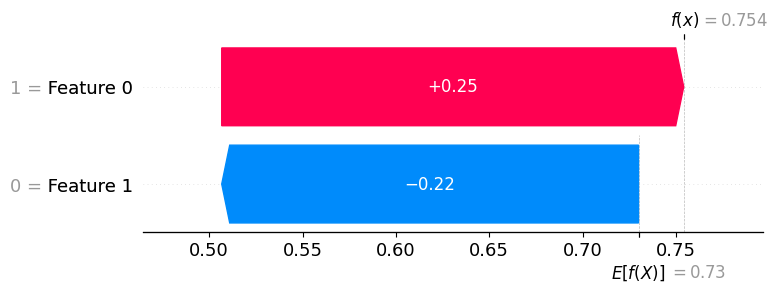

In [9]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X[:1,:])
print("Model prediction:", model.predict(X[:1,:]).squeeze().round(4))
print("SHAP values for (is_young = True, is_female = False):", shap_values[0].values)
print("SHAP base values:", shap_values[0].base_values.round(4))
print("Model output with SHAP:", (shap_values[0].base_values + shap_values[0].values.sum()).round(4))
shap.plots.waterfall(shap_values[0])

### Question 2: Compute the SHAP base value on the full set


In [10]:
# Fill in this cell


### Question 3: Compute the expectation for each features. Check that you can deduce from them the SHAP base value.

In [11]:
# Fill in this cell


### Question 4: Compute "by hand" the prediction of the first sample X[0,:]

In [12]:
# Fill in this cell


### Question 5: Compute by hand the shap values of the first sample X[0,:]. You must find exactly the values computed with the shap library.

In [13]:
# Fill in this cell


### Using only negative examples for the background distribution

The point of this second explanation example is to demonstrate how using a different background distribution can change the allocation of credit among the input features. This happens because we are now comparing the importance of a feature as compared to being someone who died (an adult man). The only thing different about the young boy from someone who died is that the boy is young, so all the credit goes to the `is_young = True` feature.

This highlights that often explanations are clearer when a well defined background group is used. In this case it changes the explanation from how this sample is different than typical, to how this sample is different from those who died (in other words, why did you live?).

Model prediction: 0.7542
SHAP values for (is_young = True, is_female = False): [0.526658 0.      ]
SHAP base values: 0.2276
Model output with SHAP: 0.7542


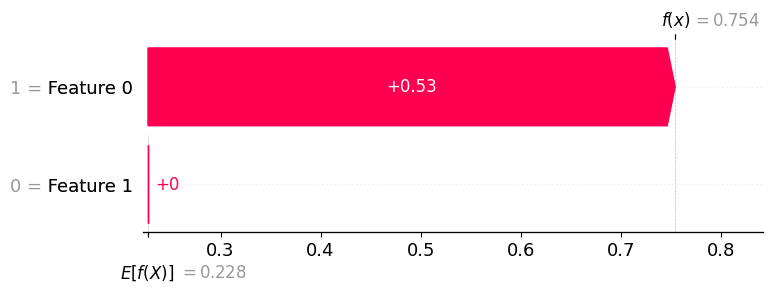

In [14]:
explainer = shap.Explainer(model.predict, X[y == 0,:])
shap_values = explainer(X[:1,:])
print("Model prediction:", model.predict(X[:1,:]).squeeze().round(4))
print("SHAP values for (is_young = True, is_female = False):", shap_values[0].values)
print("SHAP base values:", shap_values[0].base_values.round(4))
print("Model output with SHAP:", (shap_values[0].base_values + shap_values[0].values.sum()).round(4))
shap.plots.waterfall(shap_values[0])

### Question 6: Check the shap values provided by the shap library. You must follow the same approach as in the previous questions.

In [15]:
# Fill in this cell


### Using only positive examples for the background distribution

We could also use only positive examples for our background distribution, and since the difference between the expected output of the model (under our background distribution) and the current output for the young boy is zero, the sum of the SHAP values will be also be zero.

Model prediction: 0.7542
SHAP values for (is_young = True, is_female = False): [ 0.14428986 -0.30589451]
SHAP base values: 0.9158
Model output with SHAP: 0.7542


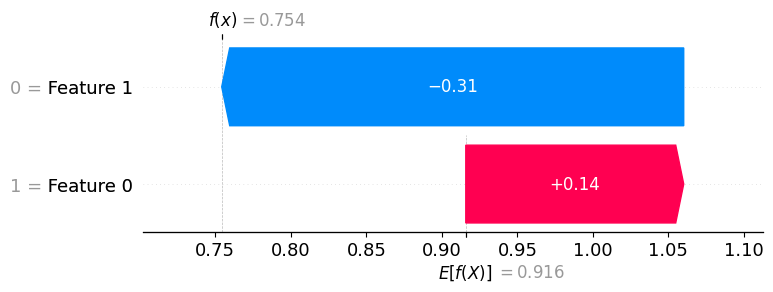

In [16]:
explainer = shap.Explainer(model.predict, X[y == 1,:])
shap_values = explainer(X[:1,:])
print("Model prediction:", model.predict(X[:1,:]).squeeze().round(4))
print("SHAP values for (is_young = True, is_female = False):", shap_values[0].values)
print("SHAP base values:", shap_values[0].base_values.round(4))
print("Model output with SHAP:", (shap_values[0].base_values + shap_values[0].values.sum()).round(4))
shap.plots.waterfall(shap_values[0])

### Question 7: Check the shap values provided by the shap library. You must follow the same approach as in the previous questions.

In [17]:
# Fill in this cell
